# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
rv = sts.expon()
sample = rv.rvs(100)

##### В качестве примера было выбрано экспоненциальное непрерывное распределение

In [3]:
sample_mean = sample.mean()
sample_dis = sample.var()
print(f'Выборочное среднее - {sample_mean}\nВыборочная дисперсия - {sample_dis}')

Выборочное среднее - 0.8484514315928667
Выборочная дисперсия - 0.7976063200904128


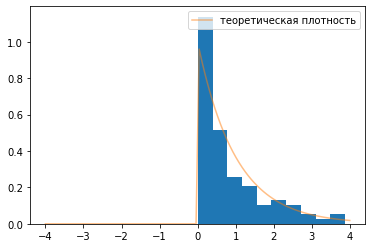

In [4]:
# Построение гистограммы
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend();

### Постройте гистограмму выборки и теоретическую плотность распределения

### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

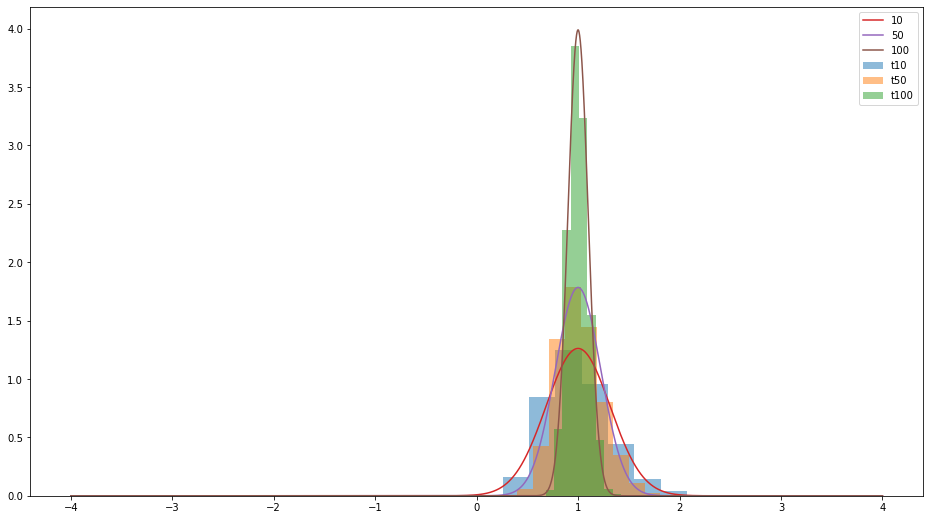

In [5]:
plt.figure(figsize=(16,9))

s = pd.Series([1]*10000)
N = [10, 20, 100]
means = list(map(lambda x: s.apply(lambda y: rv.rvs(x).mean()), N))
list(map(lambda x: plt.hist(x, density=True, alpha=.5), means))

x = np.linspace(-4,4,10000)
pdf = list(map(lambda y: sts.norm(rv.mean(), rv.var() / (y**.5)).pdf(x), N))
list(map(lambda y: plt.plot(x, y), pdf))

plt.legend(['10', '50', '100', 't10', 't50', 't100'])
plt.show();

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

#### Исходя из представленно графика я считаю для экспоненциального распределения апроксимация распределения выборочного среднего работает хорошо

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [7]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
df.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1847,WY,54,408,405-7850,no,yes,39,143.9,73,24.46,...,117,17.88,129.2,117,5.81,12.5,8,3.38,2,False
768,NJ,74,415,389-4083,no,no,0,230.9,93,39.25,...,78,18.96,157.8,101,7.10,9.7,2,2.62,3,False
1853,KY,172,415,343-5347,no,no,0,172.5,85,29.33,...,71,21.51,221.6,113,9.97,5.9,6,1.59,0,False
2200,WV,121,510,401-2468,no,no,0,177.2,142,30.12,...,88,10.50,213.2,51,9.59,8.4,6,2.27,1,False
641,VA,74,408,416-5341,no,no,0,165.3,120,28.10,...,106,16.87,208.5,102,9.38,9.8,3,2.65,1,False


In [8]:
df = df[['total day calls', 'churn']]

In [9]:
c = df[df.churn]['total day calls']
nc = df[~df.churn]['total day calls']

lc,lnc = c.shape[0],nc.shape[0]

fp1  = c.mean() - 2 * c.std() / lc**.5
fp2 = c.mean() + 2 * c.std() / lc**.5
sp1 = nc.mean() - 2 * nc.std() / lnc**.5
sp2 = nc.mean() + 2 * nc.std() / lnc**.5
print(f'[{fp1},{sp1}]')
print(f'[{sp1},{sp2}]')

[99.37134576363385,103.2994616897823]
[99.54133858857833,101.02497720089536]


##### Проведение оценки с помощью функций from statsmodels.stats.weightstats import _zconfint_generic

In [16]:
import scipy.stats as sts
from statsmodels.stats.weightstats import _zconfint_generic

In [18]:
cv = c.var(ddof=1)
ncv = nc.var(ddof=1)

print(_zconfint_generic(c.mean(), (cv/lc)**.5, .05, 'two-sided'))
print(_zconfint_generic(c.mean(), (ncv/lnc)**.5, .05, 'two-sided'))

(99.41066229112079, 103.26014516229537)
(100.60843416515448, 102.06237328826168)


#### По итогу проверки можно сделать заключение, что результирующие оценки с помощью явной формулы и встроенных в модуль statsmodels функций приблизительно равны